<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/Classification_MNIST_With_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**--Les CNNs**

In [ ]:
# Importation des donnés 

from keras.datasets.mnist import load_data
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# Retourne des tuples de données sous forme de (images, labels)
# le premier tuple est pour les données d’entraînement et le deuxième est pour les données de test
(train_digits, train_labels), (test_digits, test_labels) = load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_digits.shape

(60000, 28, 28)

**2. Preprocessing**

On a 60000 milles images de dimension 28*28

In [ ]:
# Redimensionement des images
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # Une image niveau de gris
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))


In [ ]:
train_data.shape

(60000, 28, 28, 1)

In [ ]:
# Normalisation de la taille des images [0,1]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

In [ ]:
# Transformation des dimensions des labels
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)

In [ ]:
train_labels_cat.shape

(60000, 10)

**3. Construction du modèle**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()
    # Les couches conventionnelles
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',strides=1,
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))   

    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()


In [ ]:
import time
d = time.time()
history = model.fit(train_data, train_labels_cat, 
                    epochs=15, batch_size=64,
                    validation_split=0.2)
f = time.time()
print('La durée sans GPU' +str(f-d))

Epoch 1/15
750/750 [==============================] - 15s 5ms/step - loss: 0.1931 - accuracy: 0.9386 - val_loss: 0.0700 - val_accuracy: 0.9788
Epoch 2/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0473 - val_accuracy: 0.9849
Epoch 3/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0509 - val_accuracy: 0.9858
Epoch 4/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 5/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0352 - val_accuracy: 0.9896
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0429 - val_accuracy: 0.9868
Epoch 7/15
750/750 [==============================] - 3s 5ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch

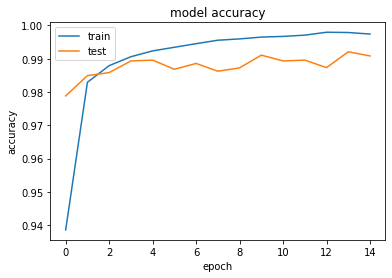

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()